# Introduction to Data Science and Machine Learning

<p align="center">
    <img width="699" alt="image" src="https://user-images.githubusercontent.com/49638680/159042792-8510fbd1-c4ac-4a48-8320-bc6c1a49cdae.png">
</p>

---

## Again on cross validation

In the previous notebooks, we introduce some concepts regarding the evaluation of predictive models. 
While this section could be slightly redundant, we intend to go into details into the cross-validation framework.

Before we dive in, let's linger on the reasons for always having training and testing sets. 
Let's first look at the limitation of using a dataset without keeping any samples out.

To illustrate the different concepts, we will use the California housing dataset.

In this dataset, the aim is to predict the median value of houses in an area in California. 
The features collected are based on general real-estate and geographical information.

The target to be predicted is a continuous variable. 
This is a typical _regression_ task.

This, we will use a predictive model specific to regression and not to classification.

### Import libraries

In [30]:
# Import libraries we will need in the following
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, ShuffleSplit
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

# set plot size
plt.rcParams['figure.figsize'] = (20, 13)
%matplotlib inline
%config InlineBackend.figure_format = "retina"

## Some exploratory data analysis

Let's first of all load the dataset and explore it to get an hint of its content.

In [2]:
housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target

print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

We imported the dataset with the option `as_frame` set to `True`. 
Hence, the returned object is a pandas dataframe.

In [3]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


To simplify future visualization, let's transform the prices from the 100 (k\\$) range to the thousand dollars (k\\$) range.

In [4]:
target *= 100
target.head()

0    452.6
1    358.5
2    352.1
3    341.3
4    342.2
Name: MedHouseVal, dtype: float64

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section <a href="https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html">here</a>.</p>
</div>

## Training error vs testing error

To solve this regression task, we will use a decision tree regressor.

In [7]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(data, target);

After training the regressor, we would like to know its potential generalisation performance once deployed in production. 
For this purpose, we use the mean absolute error, which gives us an error in the native unit, _i.e._ k\\$.

In [9]:
target_predicted = regressor.predict(data)
score = mean_absolute_error(target, target_predicted)
print(f"On average, our regressor makes an error of {score:.2f} k$")

On average, our regressor makes an error of 0.00 k$


We get perfect prediction with no error. 
As you can imagine this is too optimistic and almost always revealing a methodological problem when doing machine learning.

Indeed, we trained and predicted on the same dataset. 
Since our decision tree was fully grown, every sample in the dataset is stored in a leaf node.
Therefore, our decision tree fully memorized the dataset given during `fit` and therefore made no error when predicting.

This error computed above is called the **empirical error** or **training error**.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">In this lectures, we will consistently use the term "training error".</p>
</div>

We trained a predictive model to minimise the training error but our aim is actually to minimise the error on data that has not been seen during training.

This error is also called the **generalisation error** or the "true" **testing error**.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">In this lectures, we will consistently use the term "testing error".</p>
</div>

Thus, the most basic evaluation involves:

* splitting our dataset into two subsets: a training set and a testing set;
* fitting the model on the training set;
* estimating the training error on the training set;
* estimating the testing error on the testing set.

So let's split our dataset.

In [10]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

We are ready to train our model.

In [12]:
regressor.fit(data_train, target_train); # Note: we train on the training set

Finally, we estimate the different types of errors. 
Let's start by computing the training error.

In [13]:
target_predicted = regressor.predict(data_train)
score = mean_absolute_error(target_train, target_predicted)
print(f"The training error of our model is {score:.2f} k$")

The training error of our model is 0.00 k$


With no surprise we observe the same phenomena as in the previous experiment: our model memorized the training set. 
However, we now compute the testing error.

In [14]:
target_predicted = regressor.predict(data_test)
score = mean_absolute_error(target_test, target_predicted)
print(f"The testing error of our model is {score:.2f} k$")

The testing error of our model is 47.28 k$


This testing error is actually about what we would expect from our model if it was used in a production environment.

### Stability of the cross-validation estimates

When doing a single train-test split we do not give any indication regarding the robustness of the evaluation of our predictive model: in particular, if the test set is small, this estimate of the testing error will be unstable and would not reflect the "true error rate" we would have observed with the same model on an unlimited amount of test data.

For instance, we could have been lucky when we did our random split of our limited dataset and isolated some of the easiest cases to predict in the testing set just by chance: the estimation of the testing error would be overly optimistic, in this case.

This is where **Cross-validation** comes to the rescue. 
It allows estimating the robustness of a predictive model by repeating the splitting procedure.
It will give several training and testing errors and thus some **estimate of the variability of the model generalisation performance**.

There are [different cross-validation strategies](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators), for now we are going to focus on one called "shuffle-split". 

At each iteration of this strategy we:

- randomly shuffle the order of the samples of a copy of the full dataset;
- split the shuffled dataset into a train and a test set;
- train a new model on the train set;
- evaluate the testing error on the test set.

We repeat this procedure `n_splits` times. 
Keep in mind that the computational cost increases with `n_splits`.

<p align="center">
    <img width="1200" src="https://github.com/INRIA/scikit-learn-mooc/blob/main/figures/shufflesplit_diagram.png?raw=true">
</p>

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">This figure shows the particular case of <strong>shuffle-split</strong> cross-validation strategy using <tt class="docutils literal">n_splits=5</tt>.
For each cross-validation split, the procedure trains a model on all the red samples and evaluate the score of the model on the blue samples.</p>
</div>

In this case we will set `n_splits=40`, meaning that we will train 40 models in total and all of them will be discarded: we just record their generalisation performance on each variant of the test set.

To evaluate the generalisation performance of our regressor, we can use [`sklearn.model_selection.cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) with a [`sklearn.model_selection.ShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) object.

In [16]:
cv = ShuffleSplit(n_splits=40, test_size=0.3, random_state=0)
cv_results = cross_validate(
    regressor, data, target, cv=cv, scoring="neg_mean_absolute_error")

The results `cv_results` are stored into a Python dictionary. 
We will convert it into a pandas dataframe to ease visualisation and manipulation.

In [17]:
cv_results = pd.DataFrame(cv_results)
cv_results.head()

,fit_time,score_time,test_score
0,0.189669,0.005272,-46.909797
1,0.127402,0.002721,-46.421170
2,0.112132,0.002700,-47.411089
3,0.107890,0.002768,-44.319824
4,0.106442,0.002775,-47.607875


<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p>A score is a metric for which higher values mean better results. 
On the contrary, an error is a metric for which lower values mean better results.
The parameter <tt class="docutils literal">scoring</tt> in <tt class="docutils literal">cross_validate</tt> always expect a function that is a score.</p>
<p class="last">To make it easy, all error metrics in scikit-learn, like <tt class="docutils literal">mean_absolute_error</tt>, can be transformed into a score to be used in <tt class="docutils literal">cross_validate</tt>. 
To do so, you need to pass a string of the error metric with an additional <tt class="docutils literal">neg_</tt> string at the front to the parameter <tt class="docutils literal">scoring</tt>; for instance <tt class="docutils literal"><span class="pre">scoring="neg_mean_absolute_error"</span></tt>. 
In this case, the negative of the mean absolute error will be computed which would be equivalent to a score.</p>
</div>

Let us revert the negation to get the actual error.

In [18]:
cv_results["test_error"] = -cv_results["test_score"]

Let's check the results reported by the cross-validation.

In [19]:
cv_results.head(10)

,fit_time,score_time,test_score,test_error
0,0.189669,0.005272,-46.909797,46.909797
1,0.127402,0.002721,-46.421170,46.421170
2,0.112132,0.002700,-47.411089,47.411089
3,0.107890,0.002768,-44.319824,44.319824
4,0.106442,0.002775,-47.607875,47.607875
5,0.107420,0.002955,-45.901300,45.901300
6,0.108020,0.002750,-46.572767,46.572767
7,0.108295,0.002748,-46.194585,46.194585
8,0.108795,0.002749,-45.590236,45.590236
9,0.112358,0.002820,-45.727998,45.727998


We get timing information to fit and predict at each cross-validation iteration.
Also, we get the test score, which corresponds to the testing error on each of the splits.

In [20]:
len(cv_results)

40

We get $40$ entries in our resulting dataframe because we performed 40 splits.
Therefore, we can show the testing error distribution and thus, have an estimate of its variability.

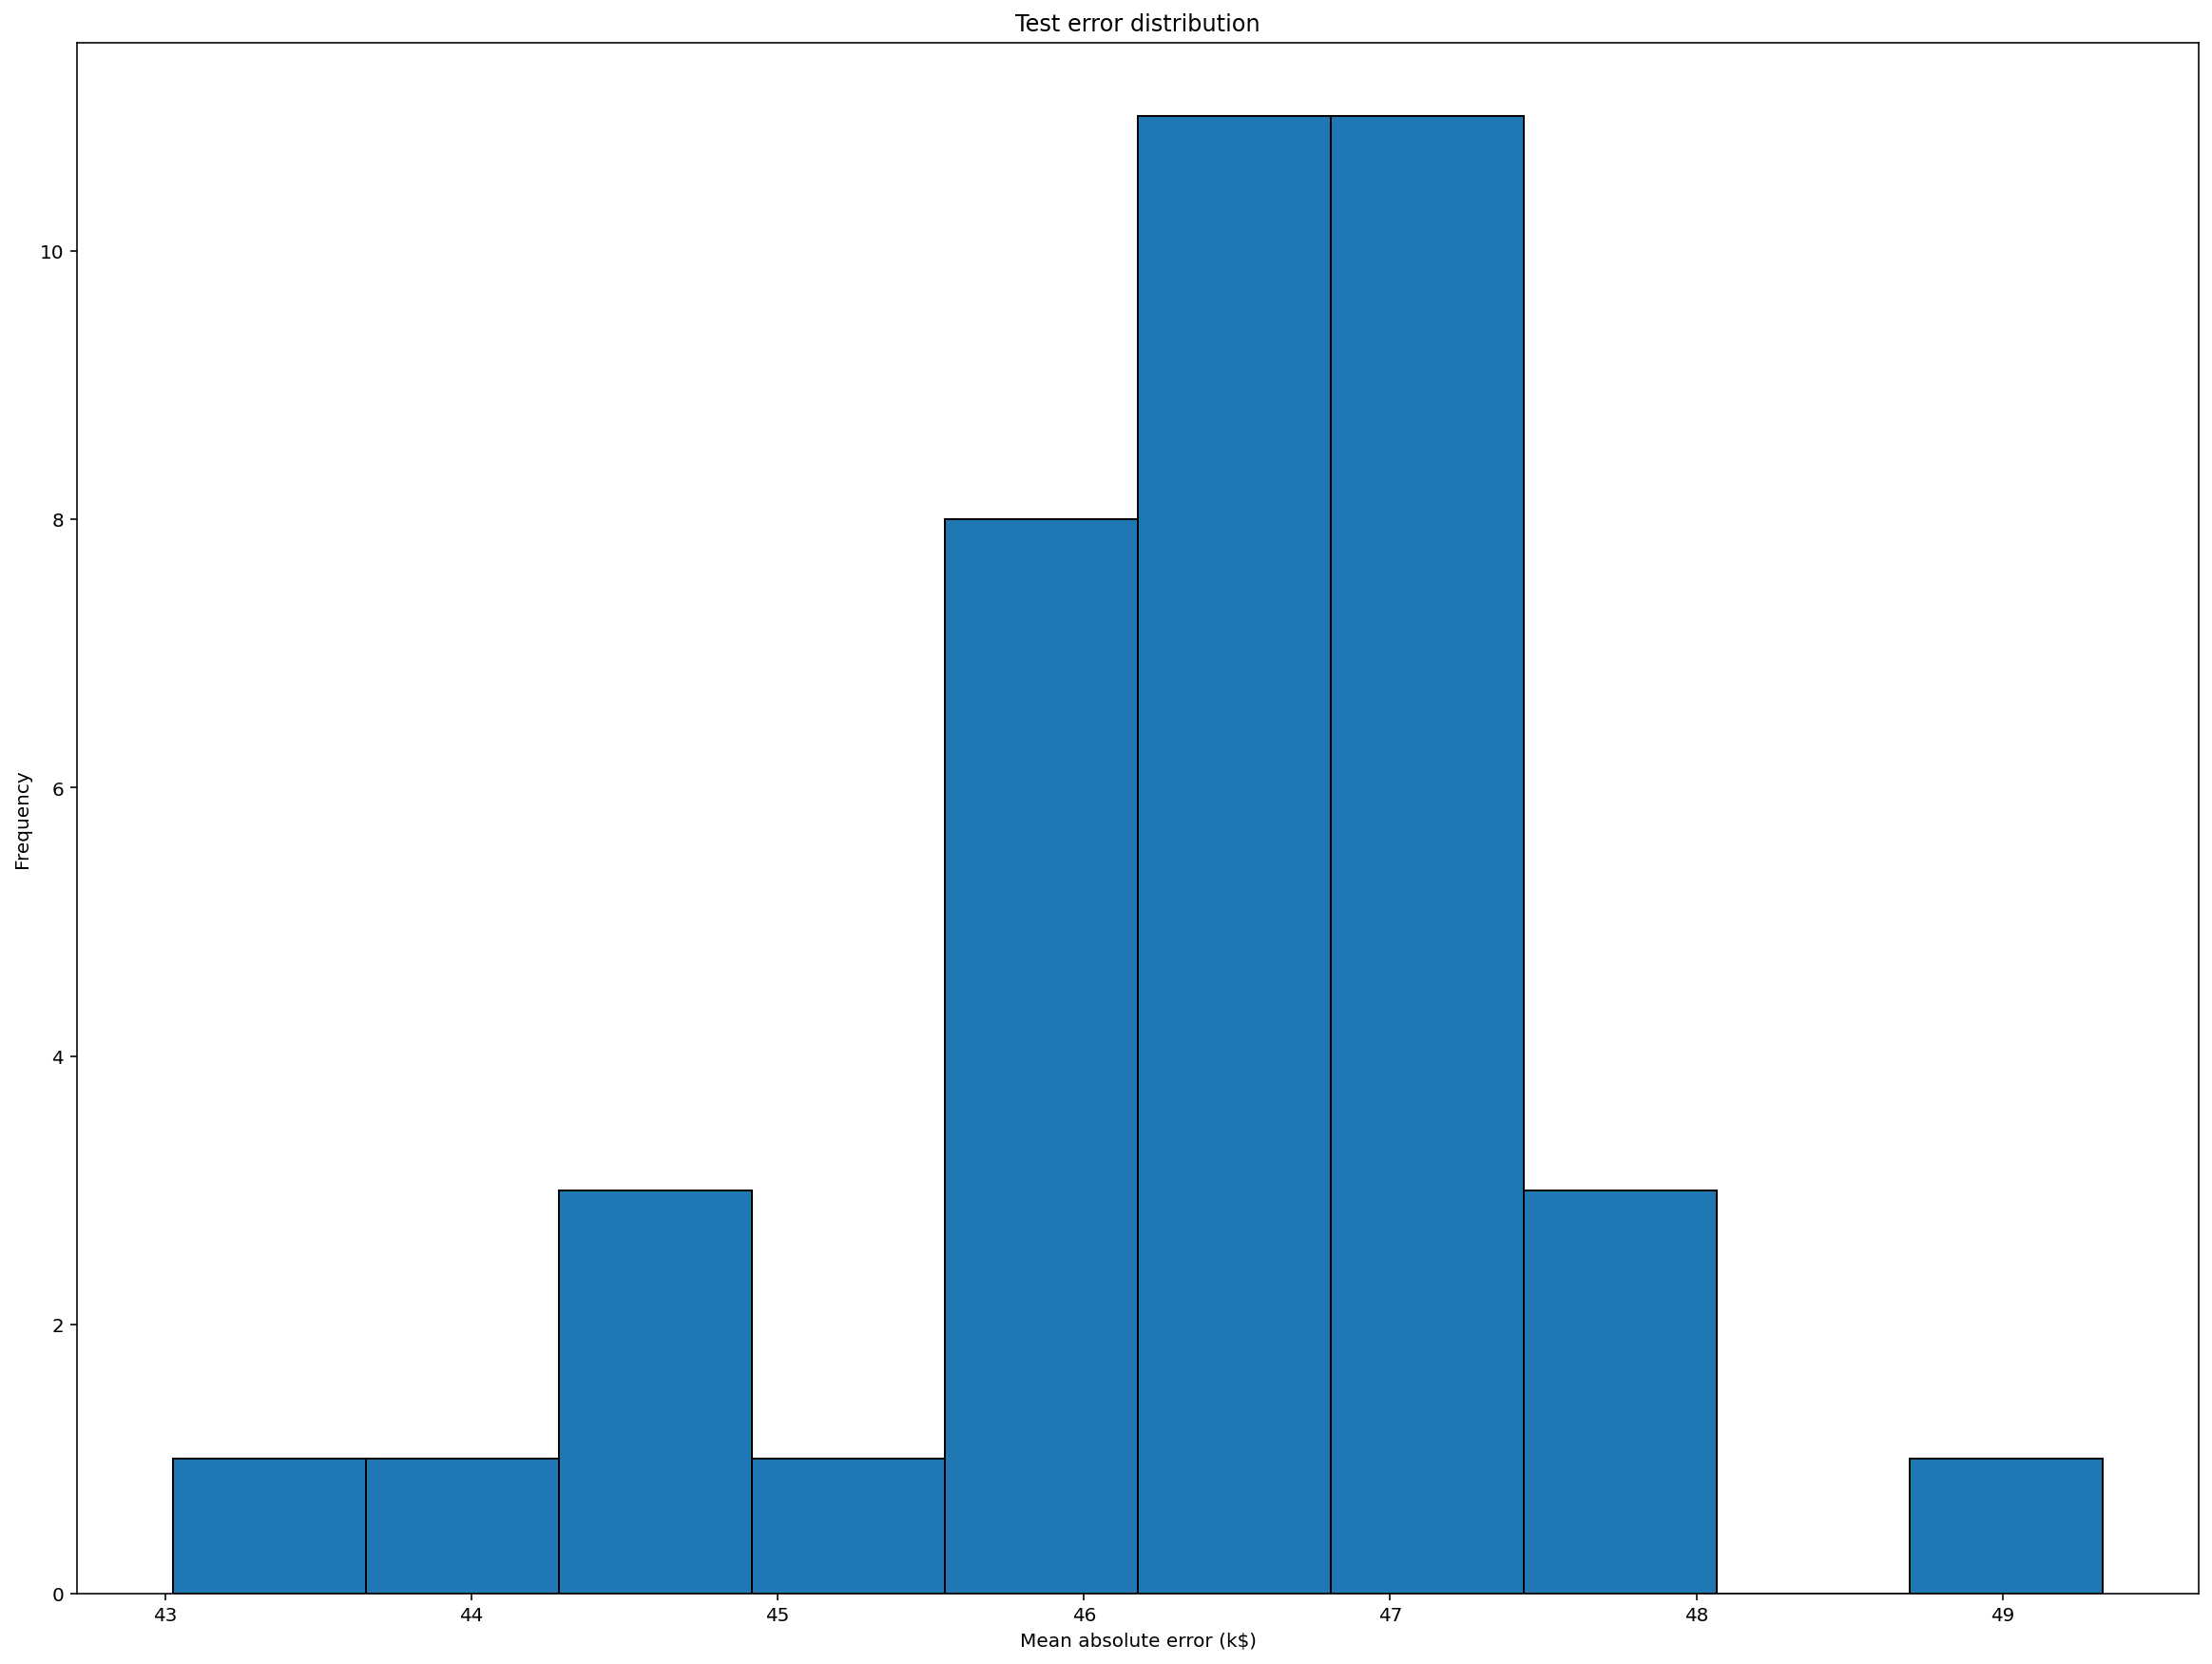

In [22]:
plt.figure(figsize=(20,15))
cv_results["test_error"].plot.hist(bins=10, edgecolor="black")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Test error distribution")

We observe that the testing error is clustered around $47$ k\\$ and ranges from
$43$ k\\$ to $50$ k\\$.

In [23]:
print(f"The mean cross-validated testing error is: "
      f"{cv_results['test_error'].mean():.2f} k$")

The mean cross-validated testing error is: 46.36 k$


In [24]:
print(f"The standard deviation of the testing error is: "
      f"{cv_results['test_error'].std():.2f} k$")

The standard deviation of the testing error is: 1.17 k$


Note that the standard deviation is much smaller than the mean: we could summarize that our cross-validation estimate of the testing error is $46.36$ +/-
$1.17$ k\\$.

If we were to train a single model on the full dataset (without cross-validation) and then later had access to an unlimited amount of test data, we would expect its true testing error to fall close to that region.

While this information is interesting in itself, it should be contrasted to the scale of the natural variability of the vector `target` in our dataset.

Let us plot the distribution of the target variable:

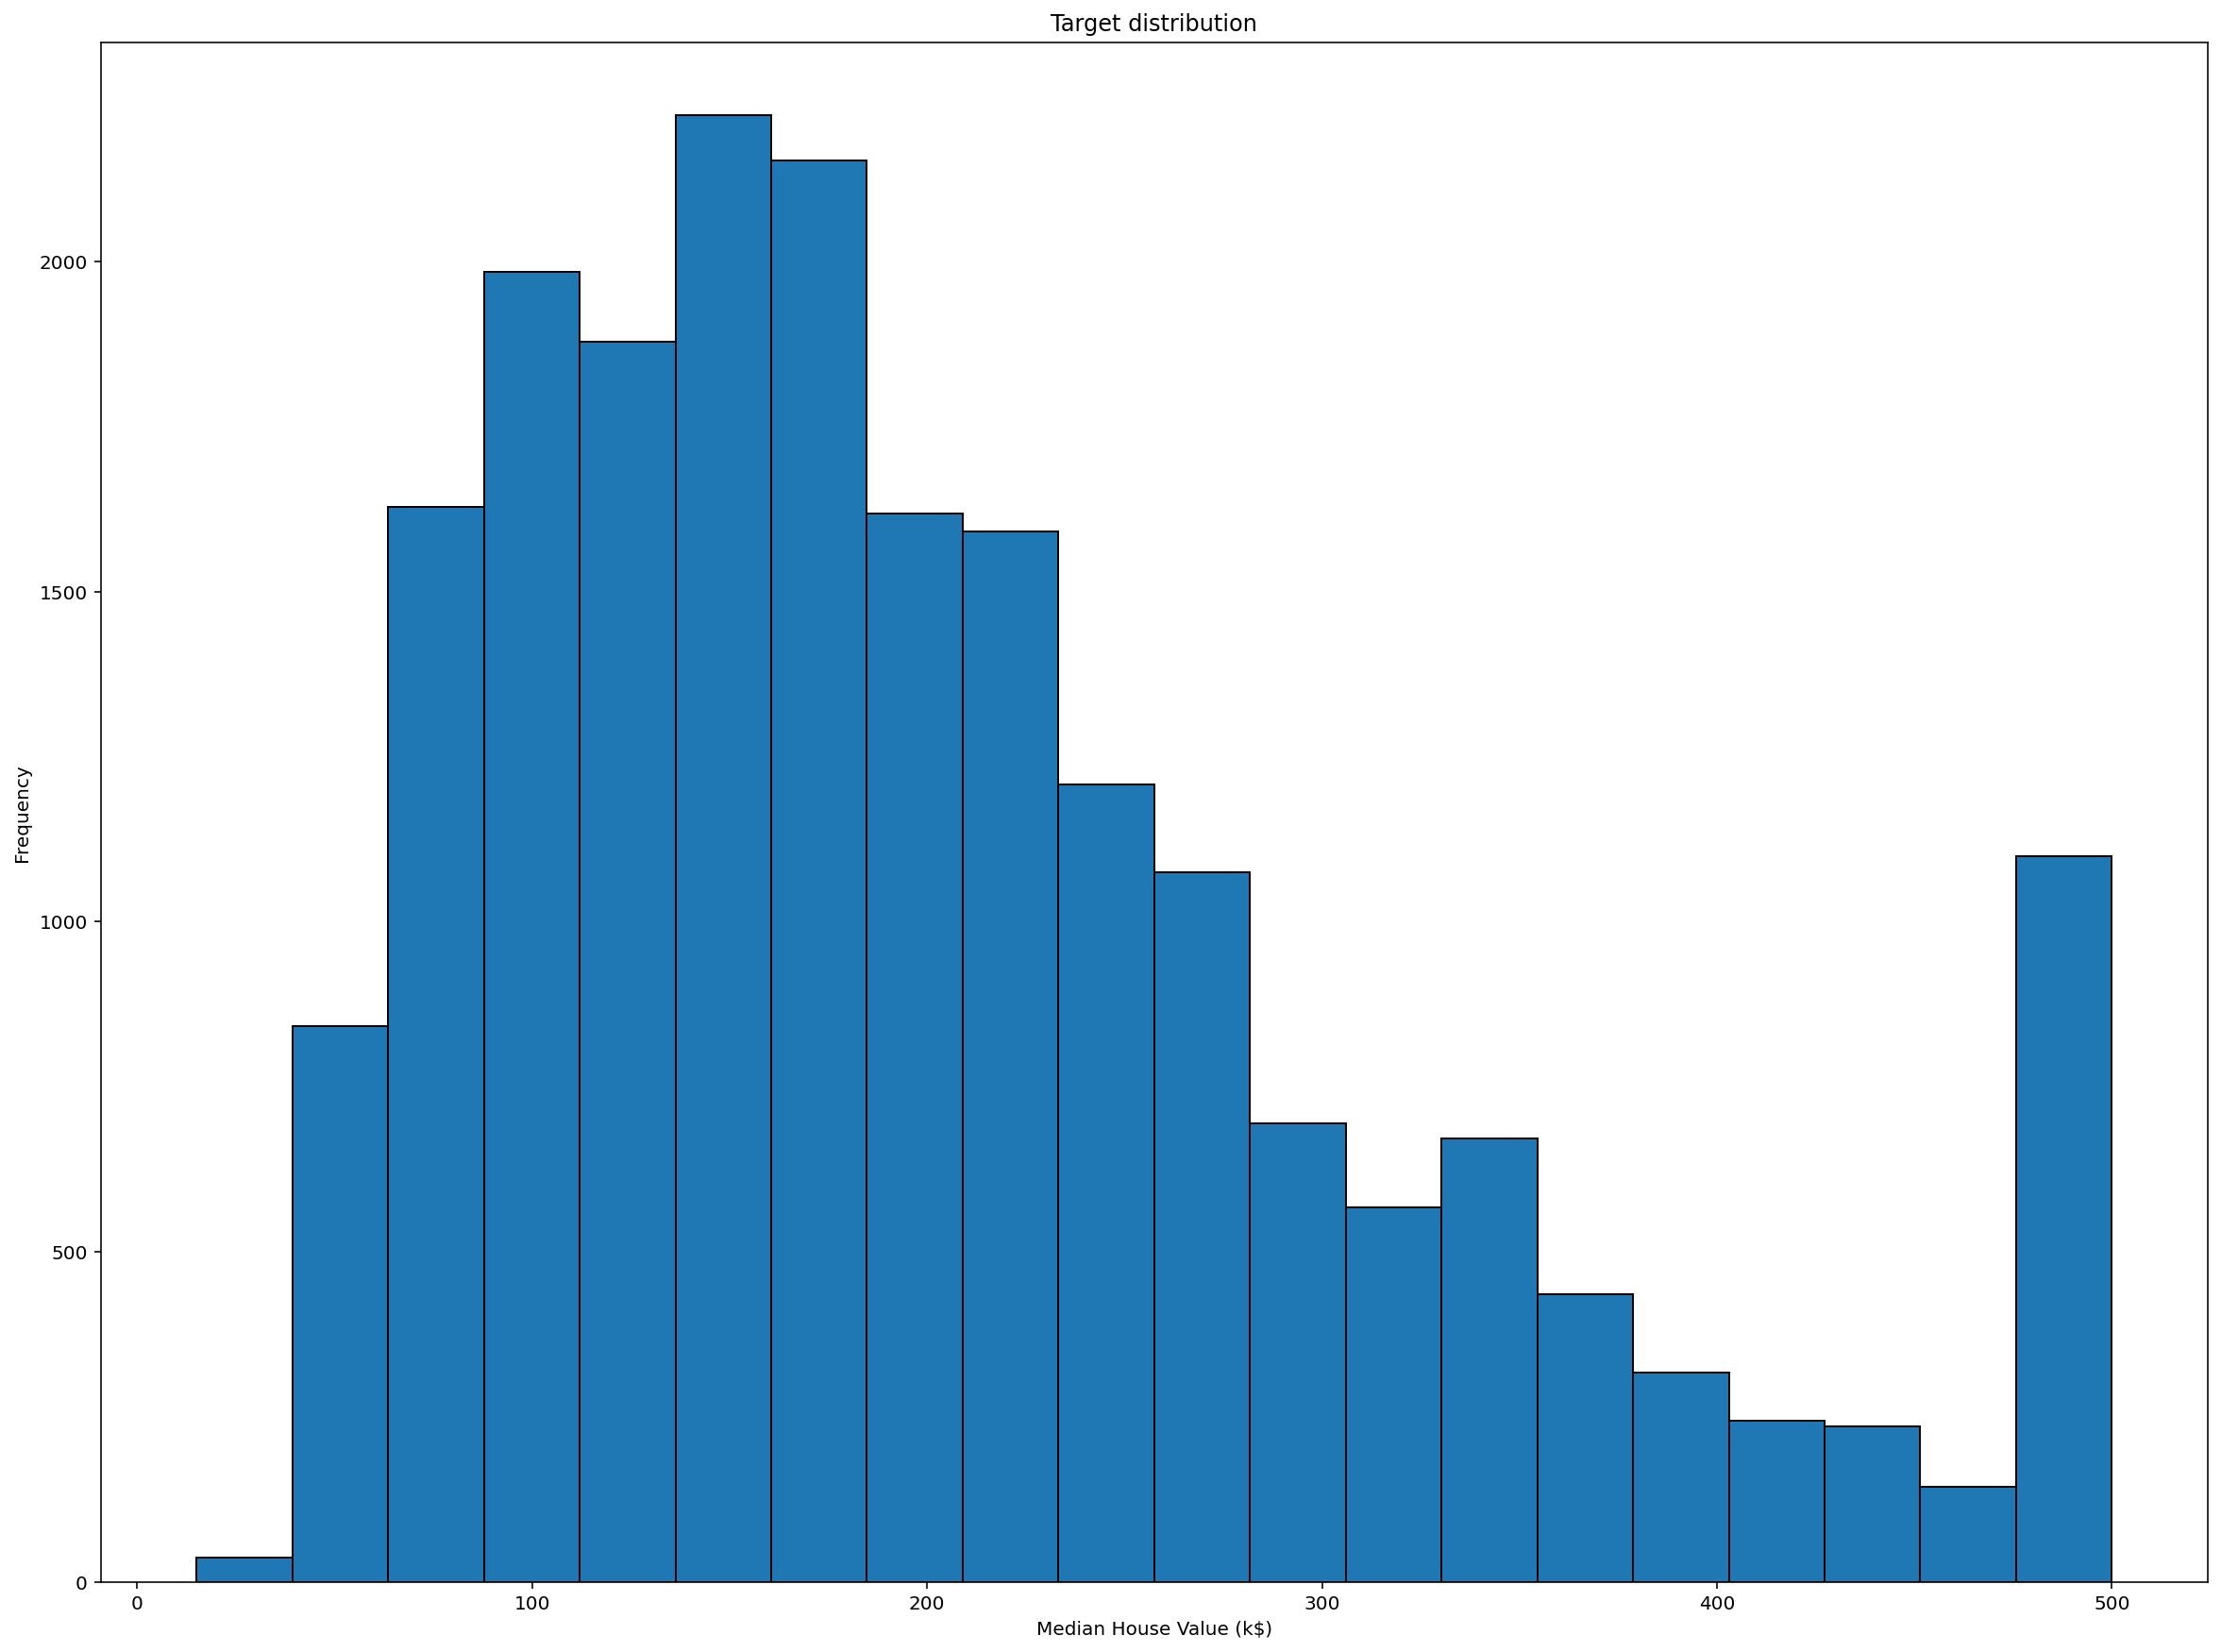

In [27]:
plt.figure(figsize=(20,15))
target.plot.hist(bins=20, edgecolor="black")
plt.xlabel("Median House Value (k$)")
_ = plt.title("Target distribution")

In [26]:
print(f"The standard deviation of the target is: {target.std():.2f} k$")

The standard deviation of the target is: 115.40 k$


The target variable ranges from close to $0$ k\\$ up to $500$ k\\$ and, with a standard deviation around $115$ k\\$.

We notice that the mean estimate of the testing error obtained by cross-validation is a bit smaller than the natural scale of variation of the target variable.
Furthermore, the standard deviation of the cross validation estimate of the testing error is even smaller.

This is a good start, but not necessarily enough to decide whether the generalization performance is good enough to make our prediction useful in practice.

We recall that our model makes, on average, an error around $47$ k\\$. 
With this information and looking at the target distribution, such an error might be acceptable when predicting houses with a $500$ k\\$.
However, it would be an issue with a house with a value of $50$ k\\$. 
Thus, this indicates that our metric (Mean Absolute Error) is not ideal.

We might instead choose a metric relative to the target value to predict: the mean absolute percentage error would have been a much better choice.

But in all cases, an error of $47$ k\\$ might be too large to automatically use our model to tag house values without expert supervision.

### More detail regarding `cross_validate`

During cross-validation, many models are trained and evaluated.
Indeed, the number of elements in each array of the output of `cross_validate` is a result from one of these `fit`/`score` procedures.
To make it explicit, it is possible to retrieve these fitted models for each of the splits/folds by passing the option `return_estimator=True` in `cross_validate`.

In [28]:
cv_results = cross_validate(regressor, data, target, return_estimator=True)
cv_results

{'fit_time': array([0.1624949 , 0.12768221, 0.12514973, 0.1268549 , 0.12099624]),
 'score_time': array([0.00342917, 0.00220013, 0.00237536, 0.00205827, 0.00217676]),
 'estimator': [DecisionTreeRegressor(random_state=0),
  DecisionTreeRegressor(random_state=0),
  DecisionTreeRegressor(random_state=0),
  DecisionTreeRegressor(random_state=0),
  DecisionTreeRegressor(random_state=0)],
 'test_score': array([0.26291527, 0.41947109, 0.44492564, 0.23357874, 0.40788361])}

In [29]:
cv_results["estimator"]

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(random_state=0)]

The five decision tree regressors corresponds to the five fitted decision trees on the different folds.
Having access to these regressors is handy because it allows to inspect the internal fitted parameters of these regressors.

In the case where you only are interested in the test score, scikit-learn provide a `cross_val_score` function. 
It is identical to calling the `cross_validate` function and to select the `test_score` only (as we extensively did in the notebooks).

In [31]:
scores = cross_val_score(regressor, data, target)
scores

array([0.26291527, 0.41947109, 0.44492564, 0.23357874, 0.40788361])

### Summary

In this notebook, we saw:

* the necessity of splitting the data into a train and test set;
* the meaning of the training and testing errors;
* the overall cross-validation framework with the possibility to study
  generalization performance variations.